In [19]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv(r"E:\Python-Notebooks\big_data_challenge\datasets_bdc\rea (1).csv")
df.head()

,Project Name,Project Description,Project Type,MOE Approval Number,Project Approval Type,Proponent Name,Proponent Website,Location,MOE Region,Application Status,EBR Number,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,Ashbridges Bay Biogas Cogeneration Plant,A 9.912 MW biogas energy plant utilizing dige...,Bioenergy,1827-8EXJG6,REA,Toronto Hydro Energy Services Inc.,http://www.torontohydroenergy.com/,Toronto Region,Central,Approved,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Merrick Landfill Site Landfill Gas Utilization...,A 1.6 MW biogas energy plant utilizing landfil...,Bioenergy,2494-8F8H5N,REA,North Bay Hydro,http://www.northbayhydro.com/public/index/,District of Nippissing,Northern,Approved,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ENS Poultry Inc.,A 0.137MW anaerobic digestion facility utilizi...,Bioenergy,9230-8QKPAR,REA,ENS Poultry Inc.,Not applicable,Wellington County,West Central,Approved,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Woolwich Bio-En Inc.,A 2.852 MW biogas energy plant utilizing a var...,Bioenergy,6428-8LGLBH,REA,Woolwich Bio-En Inc.,http://www.bio-en.ca/,Waterloo Region,West Central,Approved,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,De Bruin Farms Anaerobic Digester,0.36 MW bioenergy project,Bioenergy,4236-8T9J49,REA,De Bruins Farms Ltd.,Not applicable,Frontenac County,Eastern,Approved,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df[["Project Type", "MOE Region", "Application Status"]]
df.dropna(inplace=True)
df.replace('Eastern ', 'Eastern', inplace=True)
df.replace('Southwest ', 'Southwest', inplace=True)
df.head()

,Project Type,MOE Region,Application Status
0,Bioenergy,Central,Approved
1,Bioenergy,Northern,Approved
2,Bioenergy,West Central,Approved
3,Bioenergy,West Central,Approved
4,Bioenergy,Eastern,Approved


In [4]:
def getUniqueValues(arr):
    track = set()
    for i in arr:
        track.add(i)
    return track

In [5]:
#types = df['Project Type'].tolist()
#print(types)
project_types = getUniqueValues(df['Project Type'].tolist())
project_types_list = list(project_types)
env_benefit = {}
inverse_energy = {1:'Bioenergy', 2:'Wind', 3:'Solar'}
for i in range(len(project_types)):
    env_benefit[project_types_list[i]] = i+1
print(project_types)
print(env_benefit)

{'Solar', 'Wind', 'Bioenergy'}
{'Solar': 1, 'Wind': 2, 'Bioenergy': 3}


In [6]:
regions = getUniqueValues(df['MOE Region'].tolist())
region_list = list(regions)
print(regions)

{'Central', 'Southwest', 'Eastern', 'West Central', 'Northern'}


In [7]:
statuses = getUniqueValues(df['Application Status'].tolist())
divs = {'Under Technical Review': 1, 'Screening for Completeness': 1, 'Refused': 0, 'Application Returned /or Withdrawn':0, 'Approved':2}
print(divs)

{'Under Technical Review': 1, 'Screening for Completeness': 1, 'Refused': 0, 'Application Returned /or Withdrawn': 0, 'Approved': 2}


In [8]:
region_maps = []

#east to west, north to south
region_maps.append({'Northern': 1, 'Eastern':2, 'Central':3, 'West Central':4, 'Southwest':5})
#east to west, south to north
region_maps.append({'Northern': 5, 'Eastern':2, 'Central':3, 'West Central':4, 'Southwest':1})
#west to east, north to south
region_maps.append({'Northern': 1, 'Eastern':4, 'Central':3, 'West Central':2, 'Southwest':5})
#west to east, south to north
region_maps.append({'Northern': 5, 'Eastern':4, 'Central':3, 'West Central':2, 'Southwest':1})
#ignoring north and south
region_maps.append({'Northern': 0, 'Eastern':4, 'Central':3, 'West Central':1, 'Southwest':2})

inverse_region = {1:"Northern", 2:"Eastern", 3:"Central", 4:"West Central", 5:"Southwest"}
regions = ["Northern", "Eastern", "Central", "West Central", "Southwest"]

In [9]:
df_rm = []

for i in range(len(region_maps)):
    df_new = df.copy()
    #print(df_new.head())
    #break
    
    for j in regions:
        df_new.replace(j, region_maps[i][j], inplace=True)
    
    for energy in project_types:
        df_new.replace(energy, env_benefit[energy], inplace=True)
        
    for div in statuses:
        df_new.replace(div, divs[div], inplace=True)
    
    #print(df_new.head())
    
    df_rm.append(df_new)



234
234


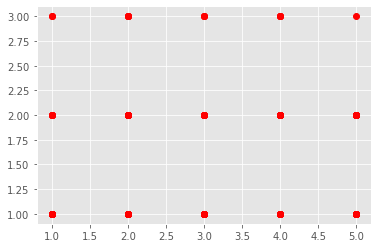

<Figure size 432x288 with 0 Axes>

In [10]:

for df_i in df_rm:
    #print(len(df_i))
    xs = []
    ys = []
    for i in range(len(df_i)):
        x = int(df_i.loc[i, "MOE Region"])
        y = int(df_i.loc[i, "Project Type"])
        xs.append(x)
        ys.append(y)
    
    print(len(xs))
    print(len(ys))
    plt.plot(xs, ys, 'ro')
    plt.show()
    plt.clf()
    break
    

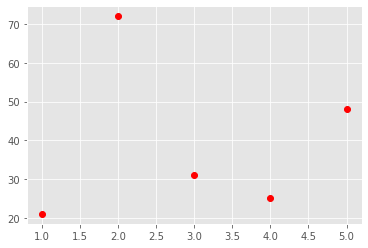

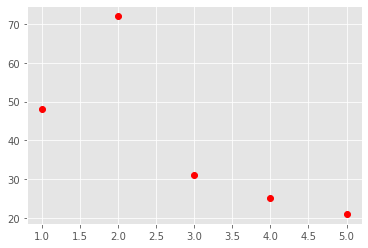

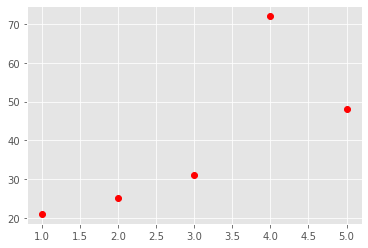

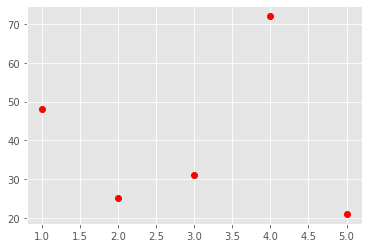

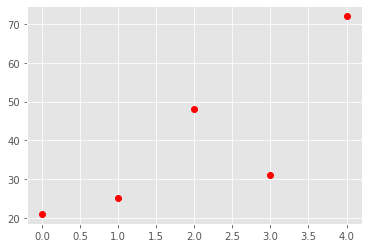

In [11]:
#approved projects
for df_i in df_rm:
    #print(len(df_i))
    approved_dict = {}
    
    for i in range(len(df_i)):
        x = int(df_i.loc[i, "MOE Region"])
        y = int(df_i.loc[i, "Application Status"])
        
        if y == 2:
            
            if x in approved_dict:
                approved_dict[x] += 1
            else:
                approved_dict[x] = 1
    
    plt.plot(approved_dict.keys(), approved_dict.values(), 'ro')
    plt.show()
    

In [12]:
def count(df, which_col, in_col, equals):
    
    count_dict = {}
    
    
    for i in range(len(df)):
        p = df.loc[i, in_col]
       # print(p)
        check = df.loc[i, which_col]
        if check == equals:
                if p in count_dict:
                    count_dict[p] += 1
                else:
                    count_dict[p] = 1
            
    return count_dict

In [13]:
main_df = df_rm[0]
approved_per_region = count(main_df, 'Application Status', 'MOE Region', 2)

bioenergy_per_region = count(main_df, 'Project Type', 'MOE Region', 1)
wind_per_region = count(main_df, 'Project Type', 'MOE Region', 2)
solar_per_region = count(main_df, 'Project Type', 'MOE Region', 3)

project_dict = {"Bioenergy":bioenergy_per_region, "Wind":wind_per_region, "Solar":solar_per_region}

approved_per_project = count(main_df, 'Application Status', 'Project Type', 2)

In [14]:
def project_count_per_region(df):
    count_dict = {}
    
    for i in range(0, len(region_maps[0])):
        count_dict[i+1] = [0,0,0]
    
    for i in range(len(df)):
        region = df.loc[i, 'MOE Region']
        project = df.loc[i, 'Project Type']
        
       # print(count_dict[i1][0])
        #print(region)
        #print(project)
        
        count_dict[region][project-1] += 1
    
    return count_dict

In [15]:
#main_df.head(20)
project_counts = project_count_per_region(main_df)

<class 'list'>


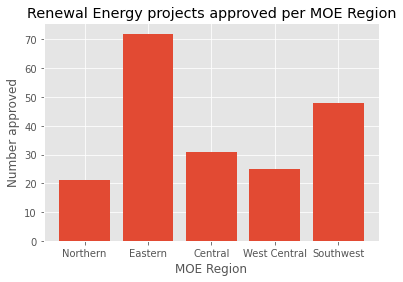

In [16]:
data = [0]*5

print(type(regions))


for key in approved_per_region:
    data[key-1] = approved_per_region[key]

plt.bar(regions, 
        data)
plt.title('Renewal Energy projects approved per MOE Region')
plt.xlabel('MOE Region')
plt.ylabel('Number approved')
plt.show()

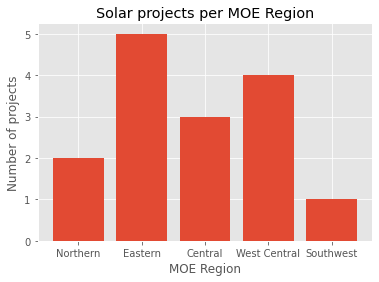

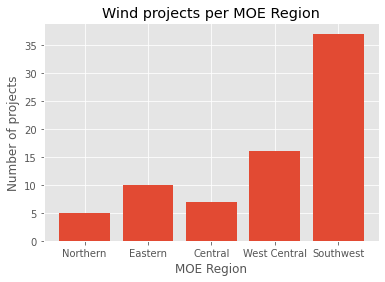

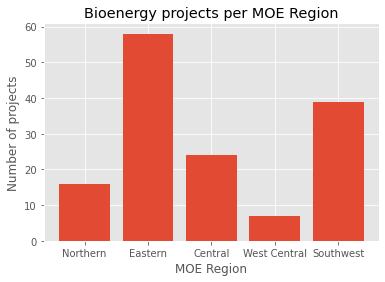

In [17]:
for project in project_types:
    data = [0]*5

    #print(type(regions))

    for key in project_dict[project]:
        data[key-1] = project_dict[project][key]

    plt.bar(regions, data)
    plt.title('{} projects per MOE Region'.format(project))
    plt.xlabel('MOE Region')
    plt.ylabel('Number of projects')
    plt.show()

<class 'list'>


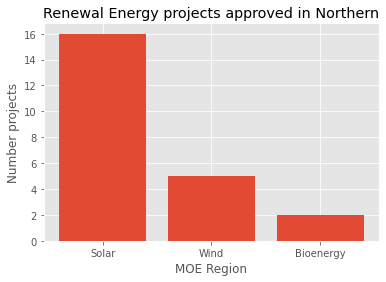

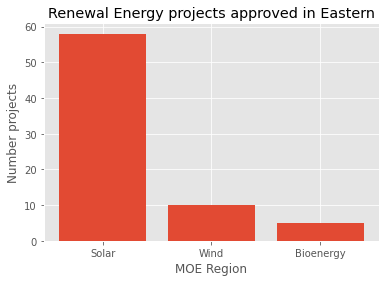

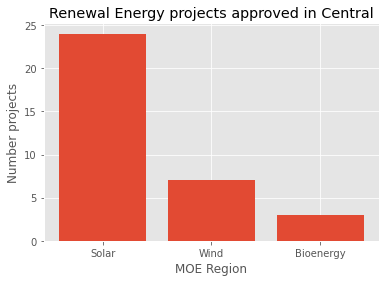

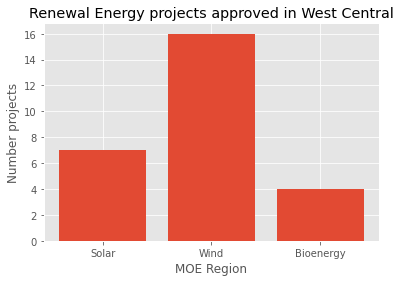

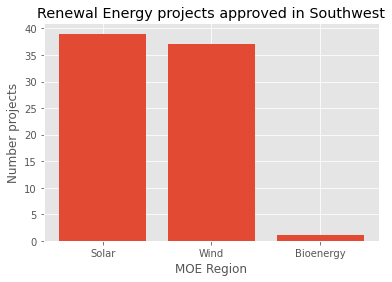

In [18]:
data = [0]*5

print(type(regions))

for region in regions:
    
    data = project_counts[region_maps[0][region]]
    
    type(data)

    plt.bar(project_types_list, 
        data)
    plt.title('Renewal Energy projects approved in {}'.format(region))
    plt.xlabel('MOE Region')
    plt.ylabel('Number projects')
    plt.show()

In [22]:
ms = MeanShift()
X = main_df.to_numpy()
ms.fit(X)

MeanShift()

In [26]:
n_clusters = ms.labels_
print(np.unique(n_clusters))

[0 1 2 3 4 5]
